# MMA/MMAB/MMAI 869 2024: Individual Assignment

Version 1: Updated June 9, 2023

<font color='red'>\# TODO: fill in the below</font>

- [YUE HU]
- [10086638]
- [MMAI2024]
- [Harry Potter]
- [Jan 6 2024]

# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-01-05 01:38:29.230657


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


# Question 1: Uncle Steve's Diamonds

## 1.0: Load data

In [6]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [7]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


## 1.1: Clustering Algorithm #1

### Install required packages

In [15]:
#install yellowbrick to visualize the Elbow curve
!pip install yellowbrick

#### Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go  #for 3D plot

from sklearn.decomposition import PCA

### EDA

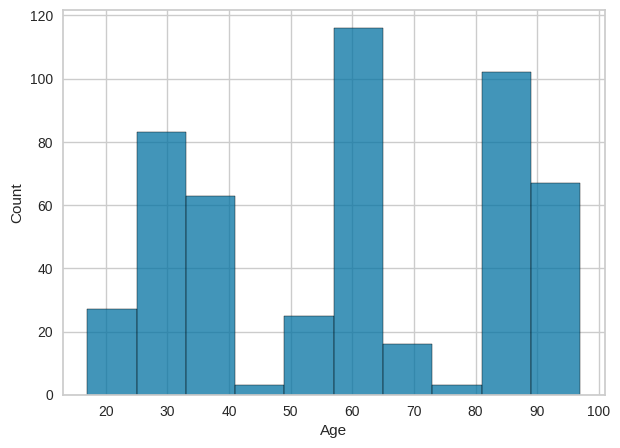

<Figure size 800x550 with 0 Axes>

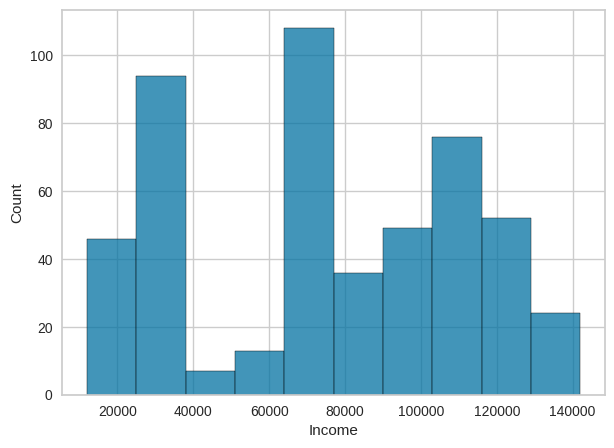

<Figure size 800x550 with 0 Axes>

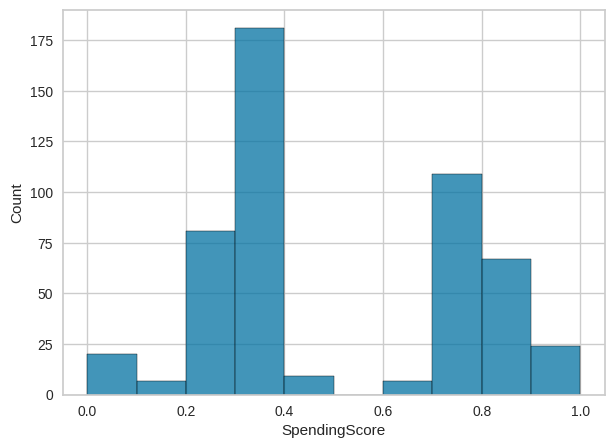

<Figure size 800x550 with 0 Axes>

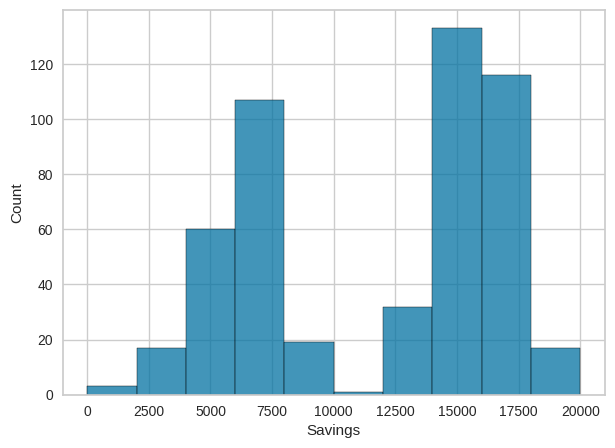

<Figure size 800x550 with 0 Axes>

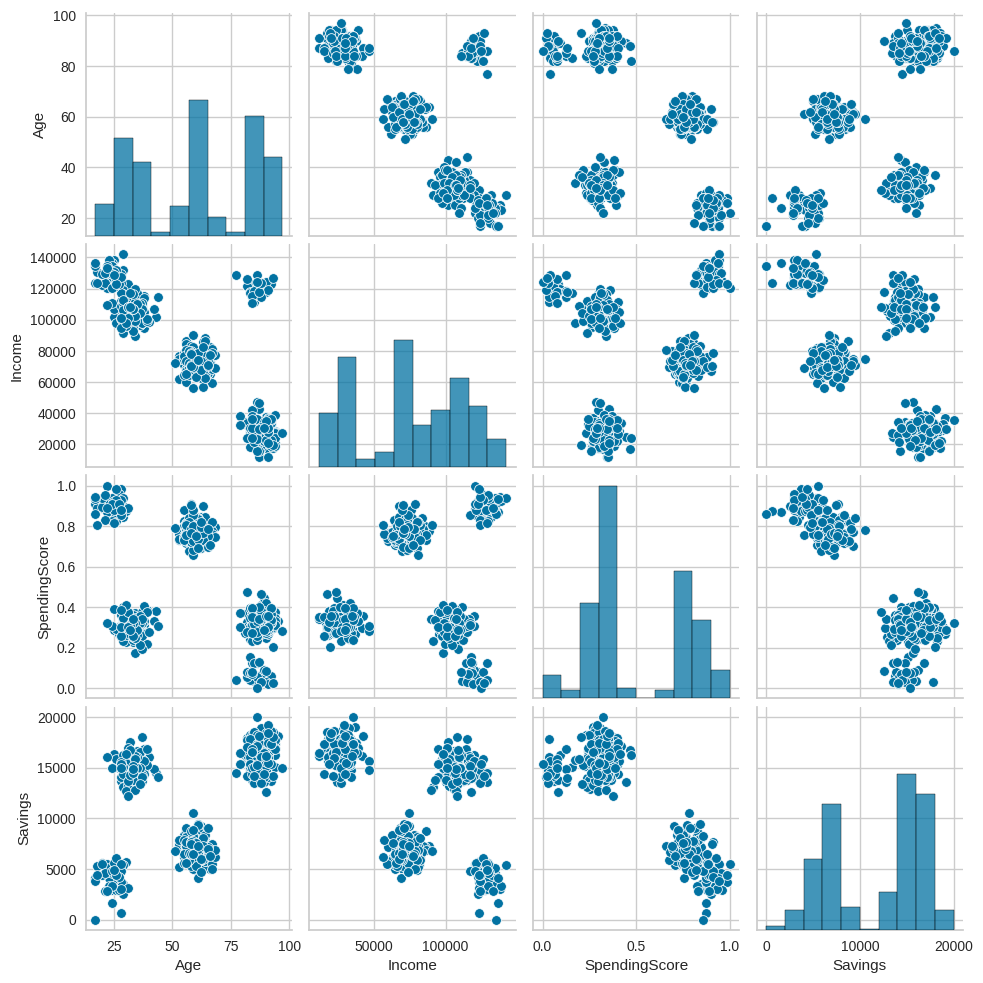

In [11]:
#plot continuous features and get pairplot to visual distributions
for i in df1.columns:
  plt.figure(figsize=(7,5), dpi=100)
  sns.histplot(data=df1, x=i)
  plt.figure();

sns.pairplot(df1)

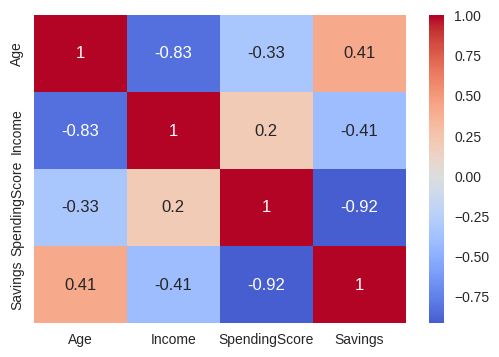

In [14]:
# Generate the correlation matrix
plt.figure(figsize=(6,4))
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.show()

In [24]:
#correlation print out
corr

,Age,Income,SpendingScore,Savings
Age,1.000000,-0.828457,-0.329116,0.412337
Income,-0.828457,1.000000,0.196111,-0.410774
SpendingScore,-0.329116,0.196111,1.000000,-0.915379
Savings,0.412337,-0.410774,-0.915379,1.000000


### KMeans Clustering

#### Preprocessing

In [26]:
#check missing value
df1.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

* No missing value for numeric features. Therefore, no missing value imputation is required for this data set.

In [16]:
#standardize numeric features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df1)

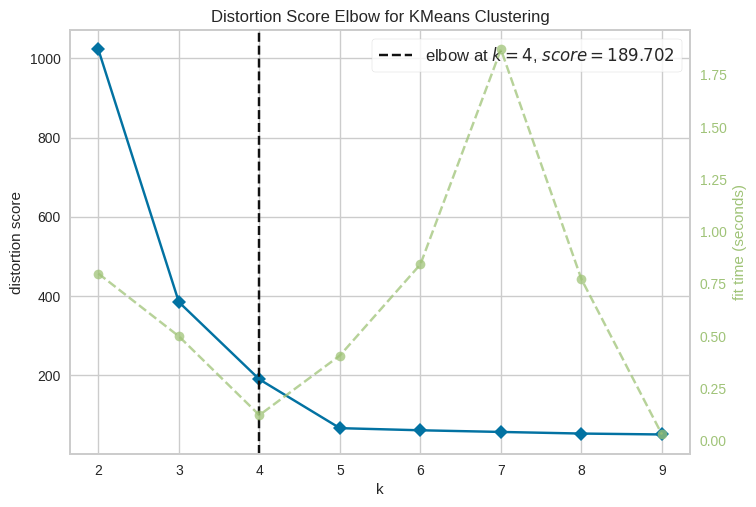

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Use elbow plot to help determine the optimized K
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(scaled_X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

* Distortion Score by elbow plot recommend cluster = 4.

Silhouette score for 2 clusters: 0.5213
Silhouette score for 3 clusters: 0.6963
Silhouette score for 4 clusters: 0.7581
Silhouette score for 5 clusters: 0.8049
Silhouette score for 6 clusters: 0.6324
Silhouette score for 7 clusters: 0.4455
Silhouette score for 8 clusters: 0.2972
Silhouette score for 9 clusters: 0.2938


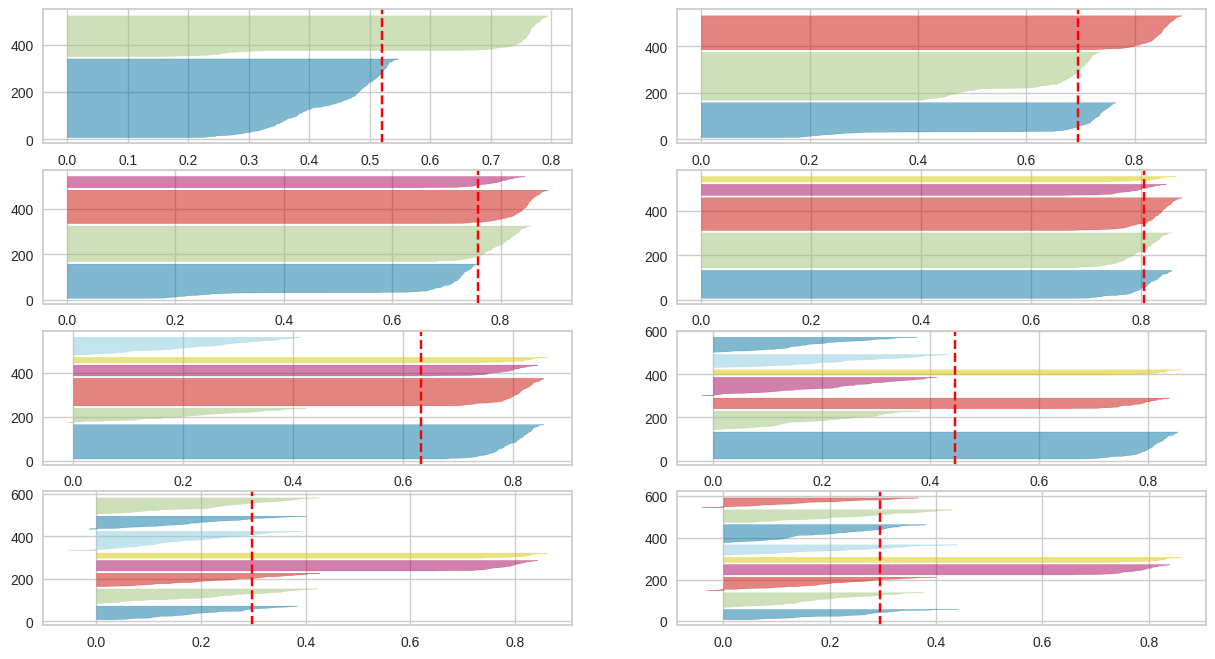

In [18]:
# Use the Silhouette method to help determine the optimized K

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_X)

     # Calculate and print the silhouette score
    silhouette_avg = silhouette_score(scaled_X, km.labels_)
    print(f"Silhouette score for {i} clusters: {silhouette_avg:.4f}")

* When k=5, Silhouette has the highest score. When k=4, we see two small groups are clustered into one bigger cluster.
* Now, plot k=4 and k=5 separately in a 3D plot to visualize the cluster datapoints to finalize the k value.

In [21]:
n=4
X = scaled_X
## K-means using k = 4
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [22]:

n=5
X = scaled_X

kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#### Conclusion:
* By the 3D vision, when k=5 the datapoints are clustered more appropriately.

#### Try PCA to handle highly correlated variables
* Given we observed "spendingscore" and "savings", "income" and "age" are highly correlated (over 80%), now consider PCA as a dimensional reduction technique.

In [24]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df1)

In [28]:
# Applying PCA
n = 3
pca = PCA(n_components=n)  # Try to reduce 1 dimension
pca.fit(scaled_X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Variance has been captured by", n, "dimensions is", sum(explained_variance))

# Transform data to principal components
pca_data = pca.transform(scaled_X)


Explained Variance Ratio: [0.63815124 0.30236345 0.04967322]
Variance has been captured by 3 dimensions is 0.9901879159917392


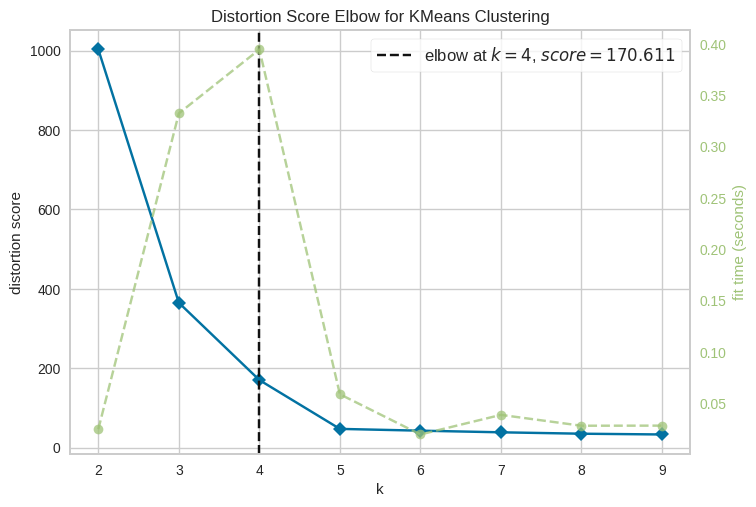

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Use elbow plot to determine the optimized K

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Silhouette score for 2 clusters: 0.5343
Silhouette score for 3 clusters: 0.7174
Silhouette score for 4 clusters: 0.7859
Silhouette score for 5 clusters: 0.8364
Silhouette score for 6 clusters: 0.6693
Silhouette score for 7 clusters: 0.4889
Silhouette score for 8 clusters: 0.3536
Silhouette score for 9 clusters: 0.3434


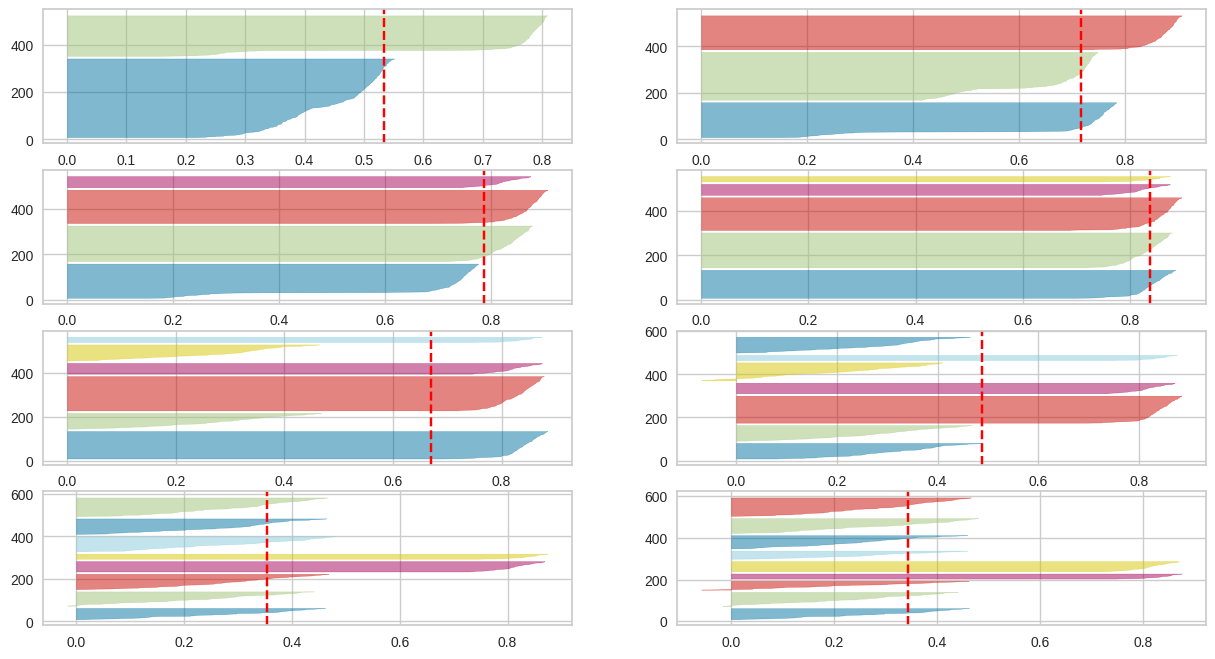

In [30]:
#Use the Silhouette method to determine the optimized K

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_data)

     # Calculate and print the silhouette score
    silhouette_avg = silhouette_score(pca_data, km.labels_)
    print(f"Silhouette score for {i} clusters: {silhouette_avg:.4f}")

* By using PCA and 1 dimension has been reduced, the best cluster number stays. When k=5, the Silhouette score is maximum, and the Elbow plot recommends k=4.
* Plot the datapoints in 3D graph again as below.


In [31]:
#import plotly.graph_objects as go  #for 3D plot
n=4
X = pca_data
## K-means using k = 4
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [32]:
n=5
X = pca_data
## K-means using k = 4
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

* We can see from the two plots, k=5 gives the best result.

### Try hyperparameter tuning to seek the best parameters.

In [33]:
# Define the parameter grid
n_clusters_options = [2, 3, 4, 5, 6, 7, 8, 9]  # Adjust based on your analysis
init_options = ['k-means++', 'random']
n_init_options = [10, 15, 20]
max_iter_options = [300, 400, 500]

# Store the results
results = []

# Iterate over all possible combinations of hyperparameters
for n_clusters in n_clusters_options:
    for init in init_options:
        for n_init in n_init_options:
            for max_iter in max_iter_options:
                # Apply KMeans
                kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                cluster_labels = kmeans.fit_predict(X)

                # Evaluate the model
                silhouette_avg = silhouette_score(X, cluster_labels)

                # Store results
                results.append({
                    'n_clusters': n_clusters,
                    'init': init,
                    'n_init': n_init,
                    'max_iter': max_iter,
                    'silhouette_score': silhouette_avg
                })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Find the best parameters
best_parameters = results_df.loc[results_df['silhouette_score'].idxmax()]

print("Best parameters found:")
print(best_parameters)

Best parameters found:
n_clusters                  5
init                k-means++
n_init                     10
max_iter                  300
silhouette_score     0.836354
Name: 54, dtype: object


In [34]:
#apply the best parameters
n=5
X = pca_data

kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#### Conclusion:
* When k=5, KMeans offers the best clustering performance.
* Now, inverse all transformation steps to interpret each cluster in the features' original scales.

### Inverse transformations

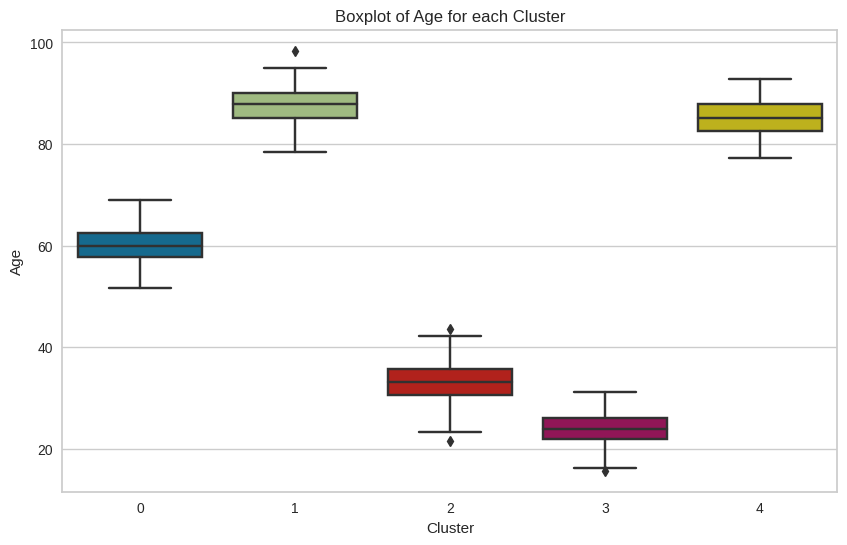

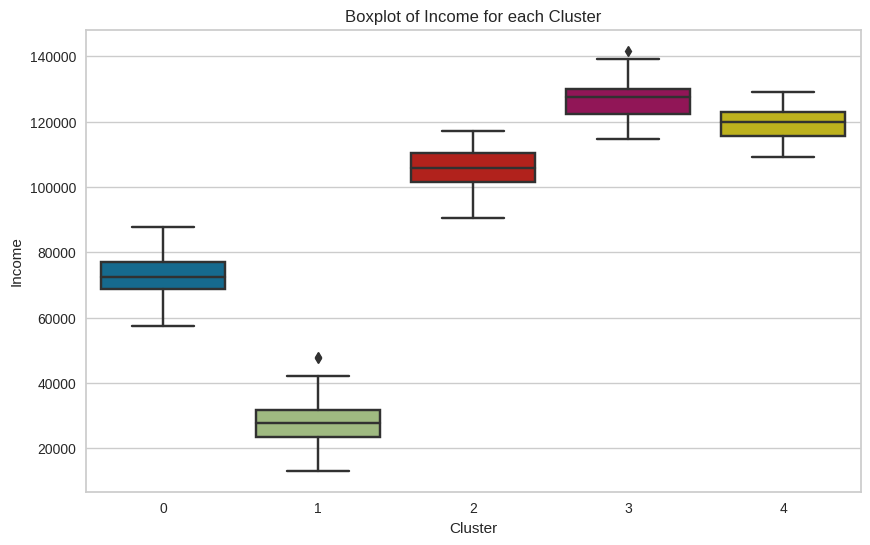

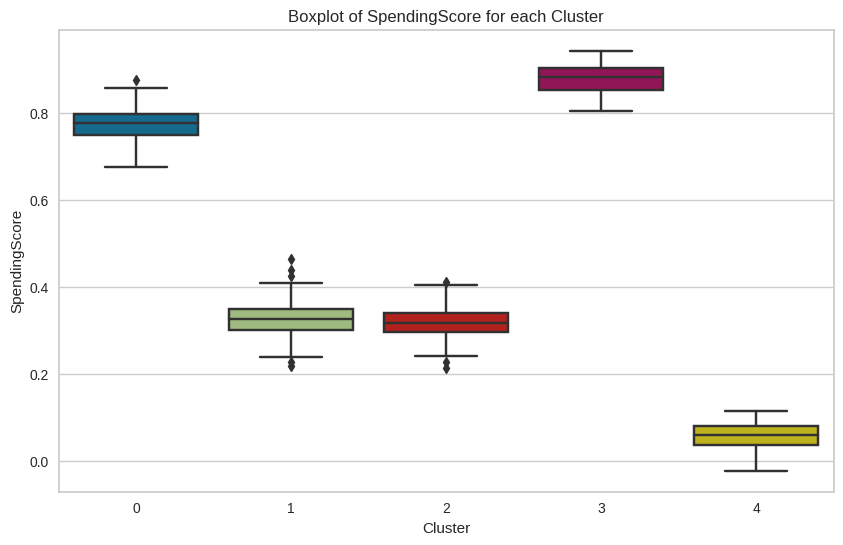

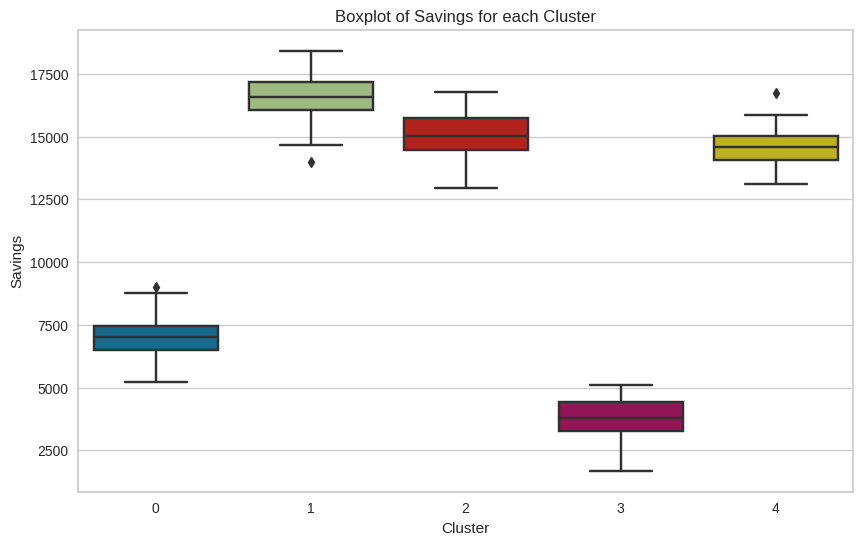

In [35]:
# Inverse PCA transformation
X_pca_inv = pca.inverse_transform(X)

# Inverse scaling transformation
X_scaled_inv = scaler.inverse_transform(X_pca_inv)

# Convert to DataFrame
df_scaled_inv = pd.DataFrame(X_scaled_inv, columns=['Age', 'Income', 'SpendingScore', 'Savings']) # Replace with your original feature names

# Add cluster labels to the DataFrame
df_scaled_inv['Cluster'] = y_kmeans

# Plotting boxplots for each cluster
for feature in ['Age', 'Income', 'SpendingScore', 'Savings']:  # Replace with your original feature names
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_scaled_inv)
    plt.title(f'Boxplot of {feature} for each Cluster')
    plt.show()

* By boxplots, we can visualize that the 5 clusters have captured different characters from the data set.
* It also helps us confirm k=5 is a good choice.

## 1.2: Clustering Algorithm #2

#### Import libaraies

In [38]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import itertools
# import matplotlib.pyplot as plt


### Agglomerative Clustering

### Hyperparameter tuning

In [39]:
#method 1: hyperparameter search by setting explicit n_cluster

# Define the range for each hyperparameter
n_clusters_range = [2, 3, 4, 5, 6, 7]
linkage_range = ['ward', 'complete', 'average', 'single']
affinity_range = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

# Store the results
results = []

# Iterate over all combinations
for n_clusters, linkage, affinity in itertools.product(n_clusters_range, linkage_range, affinity_range):
    # Skip combinations that are not valid
    if linkage == 'ward' and affinity != 'euclidean':
        continue

    # Apply Agglomerative Clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    cluster_labels = clusterer.fit_predict(X)

    # Evaluate the model
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store results
    results.append({
        'n_clusters': n_clusters,
        'linkage': linkage,
        'affinity': affinity,
        'silhouette_score': silhouette_avg
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Find the best parameters
best_parameters = results_df.loc[results_df['silhouette_score'].idxmax()]

print("Best parameters found:")
print(best_parameters)


Best parameters found:
n_clusters                  5
linkage                  ward
affinity            euclidean
silhouette_score     0.836354
Name: 48, dtype: object


In [40]:
#method 2: hyperparameter tuning by searching distance threshold

# Define the range for each hyperparameter
distance_threshold_range = np.linspace(0.1, 1.0, 20)  # Adjust this range based on your dataset
linkage_range = ['ward', 'complete', 'average', 'single']
affinity_range = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

# Store the results
results = []

# Iterate over all combinations
for distance_threshold, linkage, affinity in itertools.product(distance_threshold_range, linkage_range, affinity_range):
    # Skip combinations that are not valid
    if linkage == 'ward' and affinity != 'euclidean':
        continue

    # Apply Agglomerative Clustering
    clusterer = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance_threshold)
    cluster_labels = clusterer.fit_predict(X)

    # Check if only one cluster is formed
    if len(np.unique(cluster_labels)) == 1:
        continue

    # Evaluate the model
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store results
    results.append({
        'distance_threshold': distance_threshold,
        'linkage': linkage,
        'affinity': affinity,
        'silhouette_score': silhouette_avg,
        'n_clusters': len(np.unique(cluster_labels))
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Find the best parameters
best_parameters = results_df.loc[results_df['silhouette_score'].idxmax()]

print("Best parameters found:")
print(best_parameters)


Best parameters found:
distance_threshold         0.1
linkage                average
affinity                cosine
silhouette_score      0.836354
n_clusters                   5
Name: 10, dtype: object


#### Apply on Agglomerative Clustering

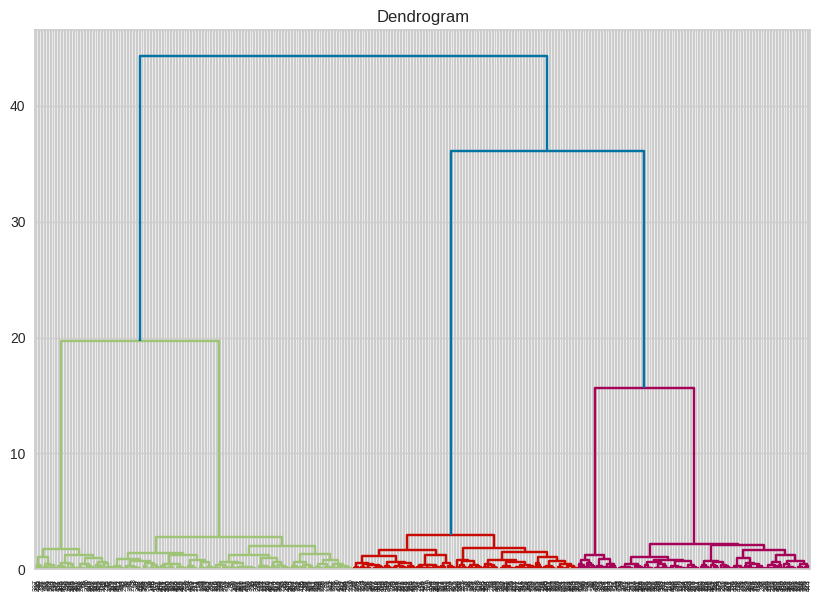

In [41]:
# Applying method 2 without specify number of clusters on Agglomerative Clustering

cluster = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.1)
cluster.fit_predict(X)

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


*  The two clusters in red and purple are more similar to each other than green.


#### Conclusion:
* By using 2 hyperparameter tuning methods, the Sihouette score is the same as 0.8363 and clusters = 5 provide the optimum result.
Thus, we have got the same results as KMeans.

## 1.3 Model Comparison

### Result and recommendations:
1. Quality -- by the Silhouette result, KMeans and Agglomerative clustering give the same quality.

2. Ease of use and scalability -- KMeans is a centroid-based algorithm, which can be better for non-elliptical clusters. Given the data set is fairly small at the moment, however, if scalability is a concern in the future, KMeans generally scales better with large datasets compared to hierarchical clustering methods.

3. Stability:
Hierarchical clustering is more sensitive to outliers. However, KMeans involves random initialization. We have to ensure the seed stays the same, otherwise, it will generate different results.

4. Interpretation:
Both KMeans and Hierarchical clusterings are easy to interpret. KMeans visual plots make it easier to visualize the datapoints and explain the clusters.

Conclusion:
KMeans is the selected model based on its widely known; acceptability of big datasets; ease of visualization and high clustering quality.



## 1.4 Personas

#### Bring the boxplot from kMeans session above for interpretation purpose

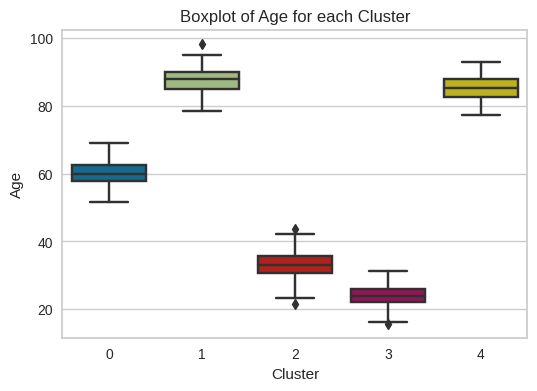

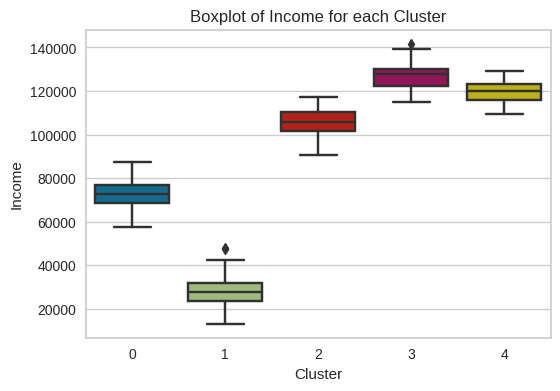

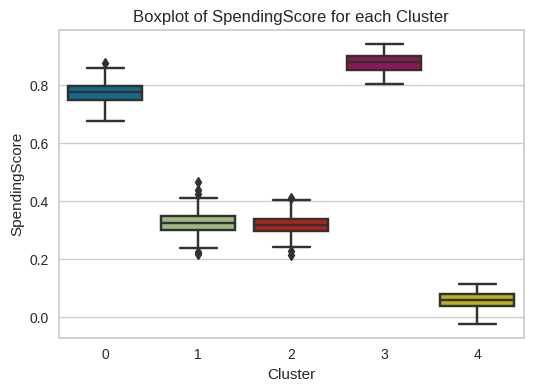

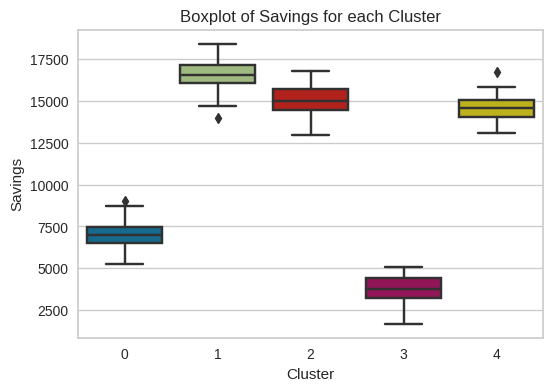

In [43]:
# Inverse PCA transformation
X_pca_inv = pca.inverse_transform(X)

# Inverse scaling transformation
X_scaled_inv = scaler.inverse_transform(X_pca_inv)

# Convert to DataFrame
df_scaled_inv = pd.DataFrame(X_scaled_inv, columns=['Age', 'Income', 'SpendingScore', 'Savings']) # Replace with your original feature names

# Add cluster labels to the DataFrame
df_scaled_inv['Cluster'] = y_kmeans

# Plotting boxplots for each cluster
for feature in ['Age', 'Income', 'SpendingScore', 'Savings']:  # Replace with your original feature names
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Cluster', y=feature, data=df_scaled_inv)
    plt.title(f'Boxplot of {feature} for each Cluster')
    plt.show()

#### Group 1 (cluster 0):
* A group of the middle class who spend quite much and do not have effective saving habits. They are about to retire or retire less than 10 years ago.

#### Group 2 (cluster 1):
* This group contains seniors who have entered their 80s. Their incomes are typically low and most of them live by their savings, thus they are not spending much. You will not see a high spending score from clients in this group.

#### Group 3 (cluster 2):
* Clients in this group are young, mostly between 20s to 40s. They have relatively high incomes and they like to save money. You may expect young couples who are saving for their property purchases, investments or families saving for their children.

#### Group 4 (cluster 3):
* Clients in this group are the youngest and have very high incomes. They spend a lot and do not save money for the future. You may expect high-income singles or young couples in their 20s to early 30s.

#### Group 5 (cluster 4):
* Clients in this group have also entered their retirement, however, they keep obtaining high incomes. They do not like to spend money at all but keep saving like other seniors who have much lower incomes. You may expect clients who have retired and making money through different ways of investing. But keep in mind, that they have the lowest desire of spending.

# Question 2: Uncle Steve's Fine Foods

## 2.1: A rule that might have high support and high confidence.

* Rule: {Aluminum Foil Pan pack} -> {Paper Towels set}

* Reasons:
1. Both items are very common in grocery shopping and appear on the same transaction for in-house or outdoor events. Since many customers will buy both together, leading to high support.

2. Additionally, there are lots of customers who purchase aluminum foil pans that also grab a pack of paper towels, indicating high confidence.  

Uncle Steve may find this rule interesting to consider offering a discount on a paper towel set when purchasing an aluminum foil pan set.



## 2.2: A rule that might have reasonably high support but low confidence.

* Rule: {prime steak} -> {flower}

* Reason:
1. High support because it is often seen that prime steak and flowers appear in one transaction in general. Both items are commonly and frequently purchased by customers.
2. Low confidence because even though both items frequently appear on one transaction, buying prime steak is not a strong predictor of buying flowers.
Uncle Steve may find this rule uninteresting since it does not offer a strong association for cross-sale promotion strategies.  

## 2.3: A rule that might have low support and low confidence.

* Rule: {permanent hair colour cream} -> {bamboo cutting board}
* Reason:
1. Low support because permanent hair colour creams and bamboo cutting boards are not commonly purchased together in grocery stores in general.
2. Low confidence because buying a permanent hair colour cream does not necessarily increase the likelihood of purchasing a bamboo cutting board.
Uncle Steve may find this rule uninteresting since it does not provide marketing strategical insights.

## 2.4: A rule that might have low support and high confidence.

* Rule: {mold control spray} -> {tile and grout brush}

* Reason:
1. Low support because mold control spray and tile grout brush do not commonly appear on grocery store transaction datasets in general. It is rare to find these two items in one transaction.
2. High confidence because even though this is not commonly seen this combination in transactions when customers purchase mold control spray, there is a high likelihood that tile and grout brush are bought in the same transaction.
Uncle Steve may find this rule interesting, and a marketing action can be placing the tile and grout brush close to mold control spray.

# Question 3: Uncle Steve's Credit Union

## 3.0: Load data and split

### Install required packages

In [4]:
pip install matplotlib seaborn

### Import required libraries

In [5]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

from datetime import datetime


In [6]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


### Simple EDA

In [7]:
print(X_train.shape)
X_train.head()


(4800, 16)


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [8]:
y_train.head()

3897    0
5628    0
1756    0
2346    0
2996    0
Name: BadCredit, dtype: int64

In [9]:
#distribution of numeric features
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X_train.describe().T)


,count,mean,std,min,25%,50%,75%,max
PreviousDefault,4800.0,0.020208,0.140727,0.0,0.00,0.0,0.0,1.0
NumberPets,4800.0,1.020833,0.816826,0.0,0.00,1.0,2.0,2.0
PreviousAccounts,4800.0,1.005208,1.010145,0.0,0.00,1.0,2.0,6.0
ResidenceDuration,4800.0,1.990833,1.397882,0.0,1.00,2.0,3.0,9.0
Amount,4800.0,3595.628958,425.243527,2158.0,3291.75,3602.0,3904.0,4982.0
Married,4800.0,0.505417,0.500023,0.0,0.00,1.0,1.0,1.0
Duration,4800.0,24.278750,9.391122,6.0,18.00,24.0,30.0,36.0


In [10]:
#missing value exploration
X_train.isnull().sum()

#no missing value found

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

In [11]:
#explore cardinality of each feature
X_train.nunique()

UserID               4800
Sex                     2
PreviousDefault         2
FirstName             568
LastName              907
NumberPets              3
PreviousAccounts        7
ResidenceDuration      10
Street               4800
LicensePlate         4799
Amount               1641
Married                 2
Duration                6
City                   20
Purpose                 8
DateOfBirth          3570
dtype: int64

In [12]:
# for the low cardinality feature, print unique values
for column in X_train.columns:
    # Check if the column is categorical
    if X[column].dtype == 'object':
        unique_values = X[column].unique()
        # Check if the number of unique values is less than 50
        if len(unique_values) < 50:
            print(f"Unique values in '{column}' (total {len(unique_values)}): {unique_values}")

Unique values in 'Sex' (total 2): ['F' 'M']
Unique values in 'City' (total 20): ['Port Keith' 'Lake Debra' 'North Judithbury' 'Lake Chad' 'East Jill'
 'Ericmouth' 'East Jessetown' 'Ramirezstad' 'Lisatown' 'New Roberttown'
 'North Noahstad' 'Robinsonshire' 'New Kellystad' 'New Jessica'
 'West Michael' 'Jacquelineland' 'Lake Roberto' 'Cassandraton'
 'Herrerafurt' 'Port Jesseville']
Unique values in 'Purpose' (total 8): ['Vacation' 'NewCar' 'Other' 'UsedCar' 'Household' 'Business' 'Education'
 'Repair']


#### Plot correlation heatmap

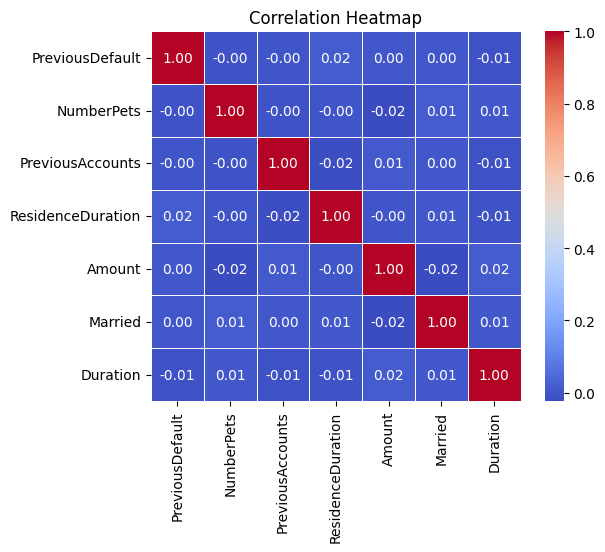

In [13]:
# Compute the correlation matrix
corr_matrix = X_train.corr()

# Set up the matplotlib figure
#plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Amount               0.439221
Duration             0.052147
PreviousAccounts     0.006951
NumberPets          -0.000113
ResidenceDuration   -0.017173
PreviousDefault     -0.033969
Married             -0.049133
Name: target, dtype: float64


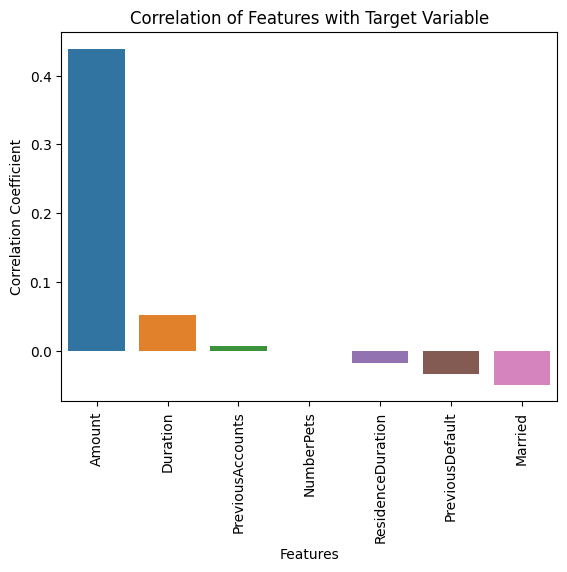

In [14]:
#get numeric feature's correlation with the target var

#combine X_train and y_train
train = X_train.copy()
train['target'] = y_train

#get correlation with target
cor_with_target = train.corr()['target'].sort_values(ascending=False)
cor_with_target.drop('target', inplace=True)

print(cor_with_target)

# Plotting
# plt.figure(figsize=(10, 6))
sns.barplot(x=cor_with_target.index, y=cor_with_target.values)
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.title('Correlation of Features with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


In [15]:
#get correlation matrix exact numbers
X_train.corr()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration
PreviousDefault,1.000000,-0.003663,-0.000741,0.015771,0.003510,0.002886,-0.008047
NumberPets,-0.003663,1.000000,-0.003667,-0.001658,-0.021674,0.014009,0.006088
PreviousAccounts,-0.000741,-0.003667,1.000000,-0.016937,0.009613,0.002626,-0.009642
ResidenceDuration,0.015771,-0.001658,-0.016937,1.000000,-0.002952,0.007226,-0.006091
Amount,0.003510,-0.021674,0.009613,-0.002952,1.000000,-0.023056,0.015201
Married,0.002886,0.014009,0.002626,0.007226,-0.023056,1.000000,0.007533
Duration,-0.008047,0.006088,-0.009642,-0.006091,0.015201,0.007533,1.000000


## 3.1: Baseline model

### 3.1.1 Perform simple feature engineering

In [16]:
#1. drop high cardinality and identity variables
def drop_high_cardi(df, max_unique):

  """
  to drop high cadinality or identity categorical variables as a simple preprocessing step
  """
  df1 = df.copy()

  for column in df.columns:
    if df[column].dtype == 'object':
      unique_values = df[column].unique()
      if len(unique_values)>max_unique:
        #drop
        df1.drop(column, axis=1, inplace=True)
        print(f"Dropped column is {column}")
  # Print the head of the modified DataFrame

  print(df1.shape)
  print(f"{df.shape[1] - df1.shape[1]} features are dropped.")


  return df1




In [17]:
X_train.shape

(4800, 16)

In [18]:
X3_1 = drop_high_cardi(X_train, 50)

Dropped column is UserID
Dropped column is FirstName
Dropped column is LastName
Dropped column is Street
Dropped column is LicensePlate
Dropped column is DateOfBirth
(4800, 10)
6 features are dropped.


In [19]:
#2. get dummies for categorical vars
X3_1_w_dummies = pd.get_dummies(X3_1)
print(X3_1_w_dummies.shape)
X3_1_w_dummies.head()

(4800, 37)


,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_F,Sex_M,City_Cassandraton,...,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,2,0,2,3329,0,12,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5628,0,0,2,2,2996,0,36,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1756,0,2,0,3,2470,0,24,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2346,0,2,1,2,3745,0,30,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2996,0,0,1,3,3549,0,36,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### 3.1.2 Random Forest Model

In [20]:
rf = RandomForestClassifier(random_state=42)

pipe3_1 = Pipeline(steps=[ ("rf", rf)])

scores3_1 = cross_val_score(pipe3_1, X3_1_w_dummies, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
print(scores3_1)
print(f"The mean AUC ROC score from 3.1 simple model is {np.mean(scores3_1)}")

[0.81341157 0.79657434 0.82393676 0.84592168 0.82238939 0.84887854
 0.8265303  0.84275136 0.79604564 0.83182604]
The mean AUC ROC score from 3.1 simple model is 0.8248265617572395


##### 3.1 model performance:
* The mean AUC ROC score from 3.1 simple model is 0.8248265617572395

## 3.2: Adding feature engineering

In [21]:
#install required package
!pip install category_encoders numexpr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [22]:
#import libraries for 3.2 onwards
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

### 3.2.1 Feature Engineering -- extract info from existing features

In [23]:
#1. get Age based on DateOfBirth
def get_age(df, var):

  df1 = df.copy()
  df1[var]=pd.to_datetime(df1[var], format='%Y-%m-%d')

  #get today's date
  today = datetime.today()
  df1['age'] = df1[var].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

  return df1

In [24]:
X3_2 = get_age(X_train, 'DateOfBirth')
X3_2.tail(1)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,age
860,256-96-0929,F,0,Jessica,Gross,1,2,0,675 Samuel Meadow,YP 9955,4106,0,30,North Judithbury,NewCar,1988-10-16,35


In [25]:
#2. drop high cardinality and identity variables
def drop_high_cardi(df, max_unique):

  """
  to drop high cadinality or identity non numerical features
  """
  df1 = df.copy()

  for column in df.columns:
    if df[column].dtype != 'int64': #changed from 3.1
      unique_values = df[column].unique()
      if len(unique_values)>max_unique:
        #drop
        df1.drop(column, axis=1, inplace=True)
        print(f"Dropped column is {column}")
  # Print the head of the modified DataFrame

  print(df1.shape)
  print(f"{df.shape[1] - df1.shape[1]} features are dropped")
  return df1


In [26]:
X3_2 = drop_high_cardi(X3_2, 50)
X3_2.tail(1)

Dropped column is UserID
Dropped column is FirstName
Dropped column is LastName
Dropped column is Street
Dropped column is LicensePlate
Dropped column is DateOfBirth
(4800, 11)
6 features are dropped


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age
860,F,0,1,2,0,4106,0,30,North Judithbury,NewCar,35


In [27]:
#3. create new features based on existing features

#amount has the highest correlation to the target. Explore and get more insights from it

def get_new_feature(df, feature):

  if feature not in df.columns:
        raise ValueError(f"Variable '{feature}' not found in dataset")

#add mean flag
  mean_value = df[feature].mean()

  mean_flag = f"over_mean_{feature}"

  df[mean_flag] = (df[feature] > mean_value).astype(int)

#add median flag
  median_value = df[feature].median()

  median_flag = f"over_median_{feature}"

  df[median_flag] = (df[feature] > median_value).astype(int)

#add top 10 flag
  top10_value = np.percentile(df[feature].dropna(),90)

  top10_flag = f"top_10_{feature}"

  df[top10_flag] = (df[feature] > top10_value).astype(int)


  return df

In [28]:
get_new_feature(X3_2, 'Amount')
X3_2

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age,over_mean_Amount,over_median_Amount,top_10_Amount
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,53,0,0,0
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,59,0,0,0
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,48,0,0,0
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,46,1,1,0
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,47,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,Robinsonshire,NewCar,51,1,1,0
5191,F,0,2,1,0,3186,0,30,North Judithbury,NewCar,50,0,0,0
5226,F,0,2,1,3,2387,1,36,Lake Roberto,Business,54,0,0,0
5390,F,0,1,1,3,3620,0,12,Lake Debra,Other,56,1,1,0


In [29]:
#5. create more new features based on existing features
def get_new_feature1(df, feature):

  if feature not in df.columns:
        raise ValueError(f"Variable '{feature}' not found in dataset")


#add mean flag
  mean_value = df[feature].mean()

  mean_flag = f"over_mean_{feature}"

  df[mean_flag] = (df[feature] > mean_value).astype(int)

#add median flag
  median_value = df[feature].median()

  median_flag = f"over_median_{feature}"

  df[median_flag] = (df[feature] > median_value).astype(int)

#add top 25 flag
  top25_value = np.percentile(df[feature].dropna(),75)

  top25_flag = f"top_25_{feature}"

  df[top25_flag] = (df[feature] > top25_value).astype(int)


  return df


In [30]:
get_new_feature1(X3_2, 'Duration')
X3_2

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age,over_mean_Amount,over_median_Amount,top_10_Amount,over_mean_Duration,over_median_Duration,top_25_Duration
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,53,0,0,0,0,0,0
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,59,0,0,0,1,1,1
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,48,0,0,0,0,0,0
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,46,1,1,0,1,1,0
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,47,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,Robinsonshire,NewCar,51,1,1,0,0,0,0
5191,F,0,2,1,0,3186,0,30,North Judithbury,NewCar,50,0,0,0,1,1,0
5226,F,0,2,1,3,2387,1,36,Lake Roberto,Business,54,0,0,0,1,1,1
5390,F,0,1,1,3,3620,0,12,Lake Debra,Other,56,1,1,0,0,0,0


In [31]:
#6. get categorical variable encoding

#combine high cardinality values
def combine_high_cardi(df, max_unique):

  """
  to combine high cardinality or identity categorical variables
  """
  df1 = df.copy()

  for column in df.columns:
      if df[column].dtype != 'int64':
          # Calculate the frequency of each value in the column
          freq = df[column].value_counts()

          # Identify values to keep (those that are in the top 'max_unique' most frequent)
          values_to_keep = set(freq.iloc[:max_unique].index)

          # Replace other values with 'other'
          df1[column] = df[column].apply(lambda x: x if x in values_to_keep else 'other')

          # Print message if modification was done
          if len(freq) > max_unique:
               print(f"Modified high cardinality column: {column}")

  print(df1.shape)
  return df1


In [32]:
X3_2 = combine_high_cardi(X3_2, 10)
X3_2.tail(1)


Modified high cardinality column: City
(4800, 17)


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age,over_mean_Amount,over_median_Amount,top_10_Amount,over_mean_Duration,over_median_Duration,top_25_Duration
860,F,0,1,2,0,4106,0,30,North Judithbury,NewCar,35,1,1,0,1,1,0


In [33]:
X3_2['City'].value_counts()

North Judithbury    1319
other                864
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Name: City, dtype: int64

In [34]:
#save a copy as intermediate step
X3_2_copy = X3_2.copy()

In [35]:
#7. target encoding
def target_encoding(df, columns, target):

  enc = ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True)
  enc_df = enc.fit_transform(df[columns], target)

  return enc_df

In [36]:
target_encode_cols = ['City', 'Purpose', 'Sex']
enc_output = target_encoding(X3_2, target_encode_cols, y_train)
enc_output

,City,Purpose,Sex
3897,0.162741,0.146444,0.178523
5628,0.193548,0.146444,0.168664
1756,0.176380,0.182131,0.168664
2346,0.151079,0.169691,0.168664
2996,0.171342,0.154286,0.178523
...,...,...,...
3772,0.170635,0.182131,0.168664
5191,0.171342,0.182131,0.168664
5226,0.189024,0.246377,0.168664
5390,0.151079,0.139189,0.168664


In [37]:
#drop redundant variables and merge with target encoded features
X3_2 = X3_2.drop(columns=target_encode_cols)
X3_2 = X3_2.merge(enc_output, left_index=True, right_index=True, how='inner')
X3_2

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,age,over_mean_Amount,over_median_Amount,top_10_Amount,over_mean_Duration,over_median_Duration,top_25_Duration,City,Purpose,Sex
3897,0,2,0,2,3329,0,12,53,0,0,0,0,0,0,0.162741,0.146444,0.178523
5628,0,0,2,2,2996,0,36,59,0,0,0,1,1,1,0.193548,0.146444,0.168664
1756,0,2,0,3,2470,0,24,48,0,0,0,0,0,0,0.176380,0.182131,0.168664
2346,0,2,1,2,3745,0,30,46,1,1,0,1,1,0,0.151079,0.169691,0.168664
2996,0,0,1,3,3549,0,36,47,0,0,0,1,1,1,0.171342,0.154286,0.178523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,51,1,1,0,0,0,0,0.170635,0.182131,0.168664
5191,0,2,1,0,3186,0,30,50,0,0,0,1,1,0,0.171342,0.182131,0.168664
5226,0,2,1,3,2387,1,36,54,0,0,0,1,1,1,0.189024,0.246377,0.168664
5390,0,1,1,3,3620,0,12,56,1,1,0,0,0,0,0.151079,0.139189,0.168664


### 3.2.2 Run Random Forest model

In [38]:
rf = RandomForestClassifier(random_state=42)

pipe3_2 = Pipeline(steps=[ ("rf", rf)])

scores3_2 = cross_val_score(pipe3_2, X3_2, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
print(scores3_2)
print(f"The mean AUC ROC score from 3.2 random forest model is {np.mean(scores3_2)}")

[0.90881235 0.91327062 0.91978184 0.91291825 0.9222944  0.92607856
 0.91464599 0.91491912 0.86762162 0.94133714]
The mean AUC ROC score from 3.2 random forest model is 0.9141679892797399


#### 3.2 model performance:
* The mean AUC ROC score from 3.2 random forest model is 0.9141679892797399

## 3.3: Adding feature selection

In [39]:
#import required libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV, RFE

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [40]:
#copy from 3.2 cleaned dataset
X3_3 = X3_2.copy()
X3_3.shape

(4800, 17)

### 3.3.1 Experiment multiple feature selection methods

##### 3.3.1.1 Univariate Feature Selection

In [89]:
#1.0 Univariate feature selection with fixed k

sel = SelectKBest(chi2, k=10)
sel.fit(X3_3, y_train)

# Get the names of the selected features
selected_features = X3_3.columns[sel.get_support()]

# Transform X3_3 to get the selected features, keeping it as a DataFrame
X3_3_univariate = pd.DataFrame(sel.transform(X3_3), columns=selected_features, index=X3_3.index)

# Check the shape and the first few rows
print(f"Optimal number of features: {X3_3_univariate.shape}")
print(f"Selected features: {selected_features}")

rf = RandomForestClassifier(random_state=42)

pipe3_3 = Pipeline(steps=[ ("rf", rf)])

scores3_3 = cross_val_score(pipe3_3, X3_3_univariate, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
print(scores3_3)
print(f"The mean AUC ROC score from 3.3 random forest model with univariate feature selection is {np.mean(scores3_3)}")



SelectKBest(score_func=<function chi2 at 0x78d4b108bf40>)

Optimal number of features: (4800, 10)
Selected features: Index(['PreviousDefault', 'Amount', 'Married', 'Duration', 'age',
       'over_mean_Amount', 'over_median_Amount', 'top_10_Amount',
       'over_median_Duration', 'top_25_Duration'],
      dtype='object')
[0.90582486 0.88990685 0.90976223 0.91035973 0.91092658 0.89758242
 0.89655853 0.90373585 0.84853267 0.92998695]
The mean AUC ROC score from 3.3 random forest model with univariate feature selection is 0.9003176663533822


In [90]:
#2.0 Univariate feature selection with optimum k
results = []

#iterate over different values of k
for k in range(1, X3_3.shape[1]+1):
  #apply selectKBest
  sel = SelectKBest(chi2, k=k)
  sel.fit(X3_3, y_train)
  # Get the names of the selected features
  selected_features = X3_3.columns[sel.get_support()]
  #get transform X3_3 to get the selected features, apply index and column names
  X3_3_univariate = pd.DataFrame(sel.transform(X3_3), columns=selected_features, index=X3_3.index)

  #run model in pipeline and get scores
  rf = RandomForestClassifier(random_state=42)
  pipe3_3 = Pipeline(steps=[ ("rf", rf)])

  scores3_3 = cross_val_score(pipe3_3, X3_3_univariate, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
  mean_score = np.mean(scores3_3)
  results.append((k, mean_score))

# Find the number of features that gave the highest mean score
optimal_k, best_score = max(results, key=lambda x: x[1])

# Output the results
print(f"Optimal number of features: {optimal_k}")
print(f"Best mean AUC ROC score: {best_score}")

# Run feature selection again with the optimum k
sel = SelectKBest(chi2, k=optimal_k)
sel.fit(X3_3, y_train)

# Get the names of the selected features
selected_features = X3_3.columns[sel.get_support()]

# Transform X3_3 to get the selected features, keeping it as a DataFrame
X3_3_univariate = pd.DataFrame(sel.transform(X3_3), columns=selected_features, index=X3_3.index)

# Check the shape and the first few rows
print(f"Optimal number of features: {X3_3_univariate.shape}")
print(f"Selected features: {selected_features}")

rf = RandomForestClassifier(random_state=42)

pipe3_3 = Pipeline(steps=[ ("rf", rf)])

scores3_3 = cross_val_score(pipe3_3, X3_3_univariate, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
print(scores3_3)
print(f"The mean AUC ROC score from 3.3 random forest model with optimum univariate feature selection is {np.mean(scores3_3)}")

SelectKBest(k=1, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=2, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=3, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=4, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=5, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=6, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=7, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=8, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=9, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=11, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=12, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=13, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=14, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=15, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=16, score_func=<function chi2 at 0x78d4b108bf40>)

SelectKBest(k=17, score_func=<function chi2 at 0x78d4b108bf40>)

Optimal number of features: 16
Best mean AUC ROC score: 0.9142851485302197


SelectKBest(k=16, score_func=<function chi2 at 0x78d4b108bf40>)

Optimal number of features: (4800, 16)
Selected features: Index(['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Married', 'Duration', 'age', 'over_mean_Amount', 'over_median_Amount',
       'top_10_Amount', 'over_mean_Duration', 'over_median_Duration',
       'top_25_Duration', 'City', 'Purpose', 'Sex'],
      dtype='object')
[0.91478735 0.91132492 0.919981   0.91768293 0.91849491 0.92439331
 0.91183879 0.91344724 0.86305423 0.9478468 ]
The mean AUC ROC score from 3.3 random forest model with optimum univariate feature selection is 0.9142851485302197


##### 3.3.2 Recursive Feature Elimination (Wrapper Method)

In [91]:
#1.0 try wrapper method with 10 features as well
clf = RandomForestClassifier(random_state=42)
sel = RFE(estimator=clf, n_features_to_select=10)
sel = sel.fit(X3_3, y_train)

X3_3_wrapper= sel.transform(X3_3)


print(f"Optimal number of features: {sel.n_features_}")
print(f"Selected features: {X3_3.columns[sel.support_]}")

rf = RandomForestClassifier(random_state=42)

pipe3_3_wrapper = Pipeline(steps=[ ("rf", rf)])

scores3_3_wrapper = cross_val_score(pipe3_3_wrapper, X3_3_wrapper, y_train,
                          scoring='roc_auc', cv=10, n_jobs=-1)
print(scores3_3_wrapper)
print(f"The mean AUC ROC score from 3.3 random forest model with recursive feature elimination feature selection is {np.mean(scores3_3_wrapper)}")



Optimal number of features: 10
Selected features: Index(['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Duration', 'age', 'over_mean_Amount', 'over_median_Amount', 'City',
       'Purpose'],
      dtype='object')
[0.90724966 0.9101146  0.91898517 0.918786   0.90931793 0.93366221
 0.90626992 0.90158114 0.85056599 0.93710358]
The mean AUC ROC score from 3.3 random forest model with recursive feature elimination feature selection is 0.9093636199418385


In [92]:
#2.0 try to optimize the best number of features

# Initialize the base classifier
clf = RandomForestClassifier(random_state=42)

# Create the RFECV object, which will score each subset of features using cross-validation
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='roc_auc')

# Fit RFECV
rfecv = rfecv.fit(X3_3, y_train)

# Transform the dataset to the selected features
X3_3_wrapper = rfecv.transform(X3_3)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {X3_3.columns[rfecv.support_]}")

# Create a pipeline with the selected features
rf = RandomForestClassifier(random_state=42)
pipe3_3_wrapper = Pipeline(steps=[("rf", rf)])

# Perform cross-validation
scores3_3_wrapper = cross_val_score(pipe3_3_wrapper, X3_3_wrapper, y_train, scoring='roc_auc', cv=10, n_jobs=-1)

print(scores3_3_wrapper)
print(f"The mean AUC ROC score from 3.3 random forest model with optimized recursive feature elimination feature selection is {np.mean(scores3_3_wrapper)}")



Optimal number of features: 16
Selected features: Index(['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Married', 'Duration', 'age', 'over_mean_Amount', 'over_median_Amount',
       'top_10_Amount', 'over_mean_Duration', 'over_median_Duration',
       'top_25_Duration', 'City', 'Purpose', 'Sex'],
      dtype='object')
[0.9163194  0.91288761 0.91382216 0.91587511 0.91717735 0.92428606
 0.92029073 0.91690692 0.86728779 0.94232345]
The mean AUC ROC score from 3.3 random forest model with optimized recursive feature elimination feature selection is 0.9147176590179888


In [95]:
seleceted_features = X3_3.columns[rfecv.support_]
seleceted_features

Index(['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Married', 'Duration', 'age', 'over_mean_Amount', 'over_median_Amount',
       'top_10_Amount', 'over_mean_Duration', 'over_median_Duration',
       'top_25_Duration', 'City', 'Purpose', 'Sex'],
      dtype='object')

#### Conclusion:
* Compared to 3.2 with feature engineering only, recursive feature elimination with cross-validation to smartly select features gives the best mean CV score in RF model.
* The mean AUC ROC score from 3.3 random forest model with optimized recursive feature elimination feature selection is 0.9147176590179888
* Selected features are: 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount','Married', 'Duration', 'age', 'over_mean_Amount', 'over_median_Amount',
'top_10_Amount', 'over_mean_Duration', 'over_median_Duration','top_25_Duration', 'City', 'Purpose', 'Sex'

## 3.4: Adding hyperparameter tuning

In [41]:
# get selected features
selected_features = ['NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount','Married', 'Duration', 'age', 'over_mean_Amount', 'over_median_Amount',
'top_10_Amount', 'over_mean_Duration', 'over_median_Duration',
'top_25_Duration', 'City', 'Purpose', 'Sex']

In [43]:
#get copy from best feature selection method dataset
X3_4 = X3_3[selected_features]
X3_4.head(1)

,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,age,over_mean_Amount,over_median_Amount,top_10_Amount,over_mean_Duration,over_median_Duration,top_25_Duration,City,Purpose,Sex
3897,2,0,2,3329,0,12,53,0,0,0,0,0,0,0.162741,0.146444,0.178523


In [44]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint


In [45]:
# Helper function to print out the results of hyperparmater tuning in a nice table.

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_val_score'] = cv_results['mean_test_score']
    results['rank_val_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_val_score'], ascending=False)
    return results

1. Grid Search

In [52]:
clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10, verbose=1)
grid_search = grid_search.fit(X3_4, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(cv_results_to_df(grid_search.cv_results_))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.9216821156398913
     bootstrap  max_depth  min_samples_leaf  min_samples_split  n_estimators  \
53        True       10.0                 4                 10           300   
51        True       10.0                 4                 10           100   
52        True       10.0                 4                 10           200   
46        True       10.0                 4                  2           200   
49        True       10.0                 4                  5           200   
..         ...        ...               ...                ...           ...   
190      False       30.0                 1                  2           200   
163      False       20.0                 1                  2           200   
108      False        NaN                 1                  

* result: Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.9216821156398913

2.Randomized Search

In [53]:
clf = RandomForestClassifier(random_state=42)

param = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],        # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}

random_search = RandomizedSearchCV(clf, param, scoring='roc_auc', cv=10, verbose=1)
random_search = random_search.fit(X3_4, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(cv_results_to_df(random_search.cv_results_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.9220506749802263
   n_estimators  min_samples_split  min_samples_leaf  max_depth  bootstrap  \
6           200                  2                 8       30.0       True   
5           500                 15                 4        NaN       True   
8           500                 10                 6       40.0       True   
3           500                  2                 2       10.0       True   
7           200                  2                 2       10.0       True   
1           500                  5                 4       20.0       True   
2           100                  5                 8       20.0      False   
4           400                 15                 2        NaN      False   
0           200                  5                 1       10.0      False   
9   

* result: Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.9220506749802263

3. Halving Grid Search

In [54]:
clf = RandomForestClassifier(random_state=42)

param = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],        # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}

grid_halve_search = HalvingGridSearchCV(clf, param, scoring='roc_auc', cv=10, verbose=1)
grid_halve_search = grid_halve_search.fit(X3_4, y_train)

# Get the best parameters and the best score
best_params = grid_halve_search.best_params_
best_score = grid_halve_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(cv_results_to_df(grid_halve_search.cv_results_))

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 40
max_resources_: 4800
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1000
n_resources: 40
Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
----------
iter: 1
n_candidates: 334
n_resources: 120
Fitting 10 folds for each of 334 candidates, totalling 3340 fits
----------
iter: 2
n_candidates: 112
n_resources: 360
Fitting 10 folds for each of 112 candidates, totalling 1120 fits
----------
iter: 3
n_candidates: 38
n_resources: 1080
Fitting 10 folds for each of 38 candidates, totalling 380 fits
----------
iter: 4
n_candidates: 13
n_resources: 3240
Fitting 10 folds for each of 13 candidates, totalling 130 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.9153070225268338
      bootstrap  max_depth  min_samples_leaf  min_samples_split  n_estimators  \
1454       True       40.0 

* result: Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.9153070225268338

4. Halving Randomized Search

In [55]:
clf = RandomForestClassifier(random_state=42)

param = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

rand_halve_search = HalvingRandomSearchCV(clf, param, scoring='roc_auc', cv=10, verbose=1)
rand_halve_search = rand_halve_search.fit(X3_4, y_train)

# Get the best parameters and the best score
best_params = rand_halve_search.best_params_
best_score = rand_halve_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(cv_results_to_df(rand_halve_search.cv_results_))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 40
max_resources_: 4800
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 40
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 40
n_resources: 120
Fitting 10 folds for each of 40 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 14
n_resources: 360
Fitting 10 folds for each of 14 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 5
n_resources: 1080
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 2
n_resources: 3240
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 201}
Best Score: 0.9181886598054649
     bootstrap  max_depth  min_samples_leaf  min_samples_split  n_estimators  \
178       True       10.0                 7

* result: Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 201}
Best Score: 0.9181886598054649

##### Conclusion:
1. Randomized Search with 10-fold CV offers the best result.
2. Best parameters are: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.922050674980226. In step 3.3, the best score was 0.914717659017988.


## 3.5: Performance estimation on testing data

Transform all steps to test set and evaluate the performance

In [46]:
X_test.shape

(1200, 16)

In [47]:
#save a copy before engineering
X_test_copy = X_test.copy()
#X_test = X_test_copy.copy()

In [48]:
# Feature Engineering

#1. Get age
X_test = get_age(X_test, 'DateOfBirth')

#2. drop high cardinality and identity variables
X_test = drop_high_cardi(X_test, 50)

#3. create new features based on existing features
X_test = get_new_feature(X_test, 'Amount')

X_test = get_new_feature1(X_test, 'Duration')

#4. combine high cardinality values
X_test = combine_high_cardi(X_test, 10)

#5. target encoding
target_encode_cols = ['City', 'Purpose', 'Sex']
enc_output_test = target_encoding(X_test, target_encode_cols, y_test)

print(enc_output_test)

#drop redundant variables and merge
X_test = X_test.drop(columns=target_encode_cols)
X_test = X_test.merge(enc_output_test, left_index=True, right_index=True, how='inner')



Dropped column is UserID
Dropped column is FirstName
Dropped column is LastName
Dropped column is Street
Dropped column is LicensePlate
Dropped column is DateOfBirth
(1200, 11)
6 features are dropped
Modified high cardinality column: City
(1200, 17)
          City   Purpose       Sex
1782  0.168675  0.165761  0.171463
3917  0.382353  0.170213  0.171463
221   0.176471  0.165761  0.171463
2135  0.150000  0.170213  0.180328
5224  0.168675  0.165761  0.171463
...        ...       ...       ...
2543  0.075472  0.193548  0.171463
1773  0.190476  0.193548  0.171463
2846  0.168675  0.165761  0.180328
5799  0.168675  0.193548  0.180328
1765  0.165680  0.241379  0.171463

[1200 rows x 3 columns]


In [49]:
# apply selected features to X_test, bring X_train back

X_test_selected = X_test[selected_features]
X_train_selected = X3_4[selected_features]


In [56]:
#run random forest model on Halving Grid Search parameters

rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=8,
    min_samples_split=2,
    n_estimators=200,
    random_state=42  # for reproducibility
)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=10, scoring='roc_auc', n_jobs=-1)

# Print the cross-validation results
print("ROC AUC scores for each fold:", cv_scores)
print("Mean ROC AUC score:", np.mean(cv_scores))
print("Standard Deviation of ROC AUC scores:", np.std(cv_scores))


rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected[selected_features])
y_pred_proba = rf.predict_proba(X_test_selected[selected_features])[:, 1]

ROC AUC scores for each fold: [0.92802427 0.91733056 0.92462312 0.92569555 0.9279017  0.92854516
 0.92315863 0.92142879 0.87563352 0.94816546]
Mean ROC AUC score: 0.9220506749802263
Standard Deviation of ROC AUC scores: 0.017298634750524174


RandomForestClassifier(max_depth=30, min_samples_leaf=8, n_estimators=200,
                       random_state=42)

* Mean ROC AUC score of training set is: 0.9220506749802263

#### Evaluate model performance on test set

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted labels')

Text(70.72222222222221, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

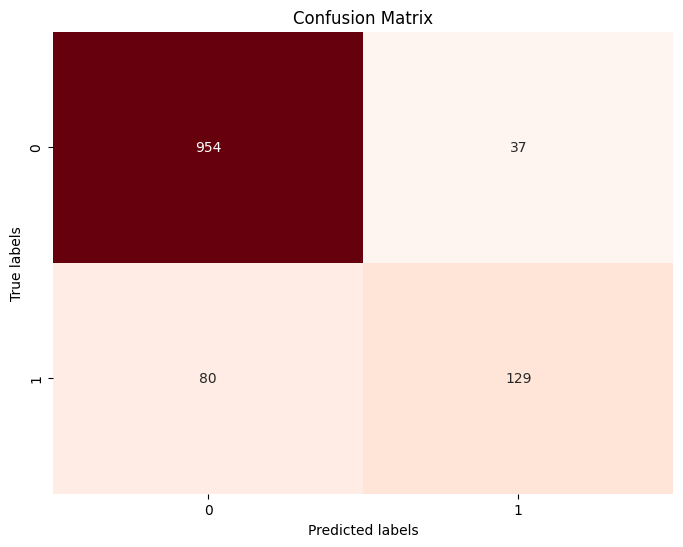

ROC AUC Score: 0.9322177105914957
F1 Score: 0.688

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       991
           1       0.78      0.62      0.69       209

    accuracy                           0.90      1200
   macro avg       0.85      0.79      0.82      1200
weighted avg       0.90      0.90      0.90      1200



In [57]:
# Evaluate the performance
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds', cbar=False)

# Add labels to the heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

* ROC AUC Score on test set: 0.9322177105914957

#### Conclusion:
* By applying appropriate feature engineering, best feature selection and hyperparameters, we obtain 0.9322 ROC AUC on the test set. No overfitting issue is found and the model performs very well on unseen data.

# Question 4: Uncle Steve's Wind Farm

## Q4. Answer:

1. Current Cost without preventative maintenance:
* Actual Fail Unit = 256

* Cost of Repairing = $20,000 per unit

* Total Cost = 256 * \$20,000 = $5,120,000

2. Cost by using Random Forest prediction
* predict to fail quantity = 251

* Cost of inspection = 251 * \$500

* Need to repair, predicted fail = 201

* Cost of repairing, predicted fail = 201 * \$2,000

* Need to repair, predicted no fail = 55

* Cost of repairing, predicted no fail = 55 * \$20,000

* Total Cost = 251 * \$500 + 201 * \$2,000 + 55 * \$20,000 = $1,627,500

3. Cost by using RNN prediction
* predict to fail quantity = 1426

* Cost of inspection = 1426 * \$500

* Need to repair, predicted fail = 226

* Cost of repairing, predicted fail = 226 * \$2,000

* Need to repair, predicted no fail = 30

* Cost of repairing, predicted no fail = 30 * \$20,000

* Total Cost = 1426 * $500 + 226 * \$2,000 + 30 * \$20,000 = \$1,765,000

### Conclusion:
* Random Forest prediction will save Uncle Steve more money. It has a total estimated cost of \$1,627,500 compared to RNN's estimated cost \$1,765,000.
* Random Forst model has a significantly lower number of false positives, it reduces unnecessary inspection costs while maintaining a good number of false negatives.
* Even though RNN has a better recall, Random Forest's better precision in predicting failures gives a more cost-effective choice.